In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
plt.rcParams['figure.figsize'] = (15, 40) # No need of this statement for each graph: plt.figure(figsize=[15, 9])

# from mpl_toolkits.basemap import Basemap
# import gsw.density as density

In [2]:
path_in = "./"
out_path = "./"

#file_ds = xr.open_dataset(path_in + 'global-analysis-forecast-phy-001-024-monthly_1643785075501.nc')
file_ds = xr.open_dataset(path_in + 'transports2.nc')
#print(file_ds)
file_ds.info
# file_ds.dims
# file_ds.coords

<bound method Dataset.info of <xarray.Dataset>
Dimensions:              (time: 7670, transport: 2, N_2: 2)
Coordinates:
  * time                 (time) datetime64[ns] 2000-01-02T12:00:00 ... 2020-1...
Dimensions without coordinates: transport, N_2
Data variables: (12/29)
    sectionname          (transport) |S20 ...
    transportname        (transport) |S20 ...
    mask_variable_name   (transport) |S20 ...
    mask_variable_range  (transport, N_2) float32 ...
    section_lon          (transport, N_2) float32 ...
    section_lat          (transport, N_2) float32 ...
    ...                   ...
    ECO_prim_transport   (time, transport) float32 ...
    ECO_secp_transport   (time, transport) float32 ...
    ECO_parm_transport   (time, transport) float32 ...
    ECO_sed1_transport   (time, transport) float32 ...
    ECO_sed2_transport   (time, transport) float32 ...
    ECO_sed3_transport   (time, transport) float32 ...
Attributes:
    title:        TOPAZ transport across sections
    in

In [3]:
# Set the coordinate names (used later for accessing the data)
time_name = "time"
time_var = file_ds[time_name]

# # Set the variable names

prim_trans = "ECO_prim_transport"
prim_var_WAS = file_ds[prim_trans][:,0]
prim_var_EAS = file_ds[prim_trans][:,1]

secp_trans = "ECO_secp_transport"
secp_var_WAS = file_ds[secp_trans][:,0]
secp_var_EAS = file_ds[secp_trans][:,1]

det_trans = "ECO_det_transport"
det_var_WAS = file_ds[det_trans][:,0]
det_var_EAS = file_ds[det_trans][:,1]

no3_trans = "ECO_no3_transport"
no3_var_WAS = file_ds[no3_trans][:,0]
no3_var_EAS = file_ds[no3_trans][:,1]

pho_trans = "ECO_pho_transport"
pho_var_WAS = file_ds[pho_trans][:,0]
pho_var_EAS = file_ds[pho_trans][:,1]

oxy_trans = "ECO_oxy_transport"
oxy_var_WAS = file_ds[oxy_trans][:,0]
oxy_var_EAS = file_ds[oxy_trans][:,1]

# time_var.shape
# prim_var_sec2.shape

## monthly mean from daily data 

In [15]:
time_var_mon = time_var.resample(time="MS").mean()

prim_trans = "ECO_prim_transport"
prim_var_WAS_mon = prim_var_WAS.resample(time="MS").mean()
prim_var_EAS_mon = prim_var_EAS.resample(time="MS").mean()

secp_trans = "ECO_secp_transport"
secp_var_WAS_mon = secp_var_WAS.resample(time="MS").mean()
secp_var_EAS_mon = secp_var_EAS.resample(time="MS").mean()

det_trans = "ECO_det_transport"
det_var_WAS_mon = det_var_WAS.resample(time="MS").mean()
det_var_EAS_mon = det_var_EAS.resample(time="MS").mean()

no3_trans = "ECO_no3_transport"
no3_var_WAS_mon = no3_var_WAS.resample(time="MS").mean()
no3_var_EAS_mon = no3_var_EAS.resample(time="MS").mean()

pho_trans = "ECO_pho_transport"
pho_var_WAS_mon = pho_var_WAS.resample(time="MS").mean()
pho_var_EAS_mon = pho_var_EAS.resample(time="MS").mean()

oxy_trans = "ECO_oxy_transport"
oxy_var_WAS_mon = oxy_var_WAS.resample(time="MS").mean()
oxy_var_EAS_mon = oxy_var_EAS.resample(time="MS").mean()

#

## annual mean from daily data 

In [14]:
time_var_ann = time_var.resample(time="AS").mean()

prim_trans = "ECO_prim_transport"
prim_var_WAS_ann = prim_var_WAS.resample(time="AS").mean()
prim_var_EAS_ann = prim_var_EAS.resample(time="AS").mean()

secp_trans = "ECO_secp_transport"
secp_var_WAS_ann = secp_var_WAS.resample(time="AS").mean()
secp_var_EAS_ann = secp_var_EAS.resample(time="AS").mean()

det_trans = "ECO_det_transport"
det_var_WAS_ann = det_var_WAS.resample(time="AS").mean()
det_var_EAS_ann = det_var_EAS.resample(time="AS").mean()

no3_trans = "ECO_no3_transport"
no3_var_WAS_ann = no3_var_WAS.resample(time="AS").mean()
no3_var_EAS_ann = no3_var_EAS.resample(time="AS").mean()

pho_trans = "ECO_pho_transport"
pho_var_WAS_ann = pho_var_WAS.resample(time="AS").mean()
pho_var_EAS_ann = pho_var_EAS.resample(time="AS").mean()

oxy_trans = "ECO_oxy_transport"
oxy_var_WAS_ann = oxy_var_WAS.resample(time="AS").mean()
oxy_var_EAS_ann = oxy_var_EAS.resample(time="AS").mean()

#

## daily time series 

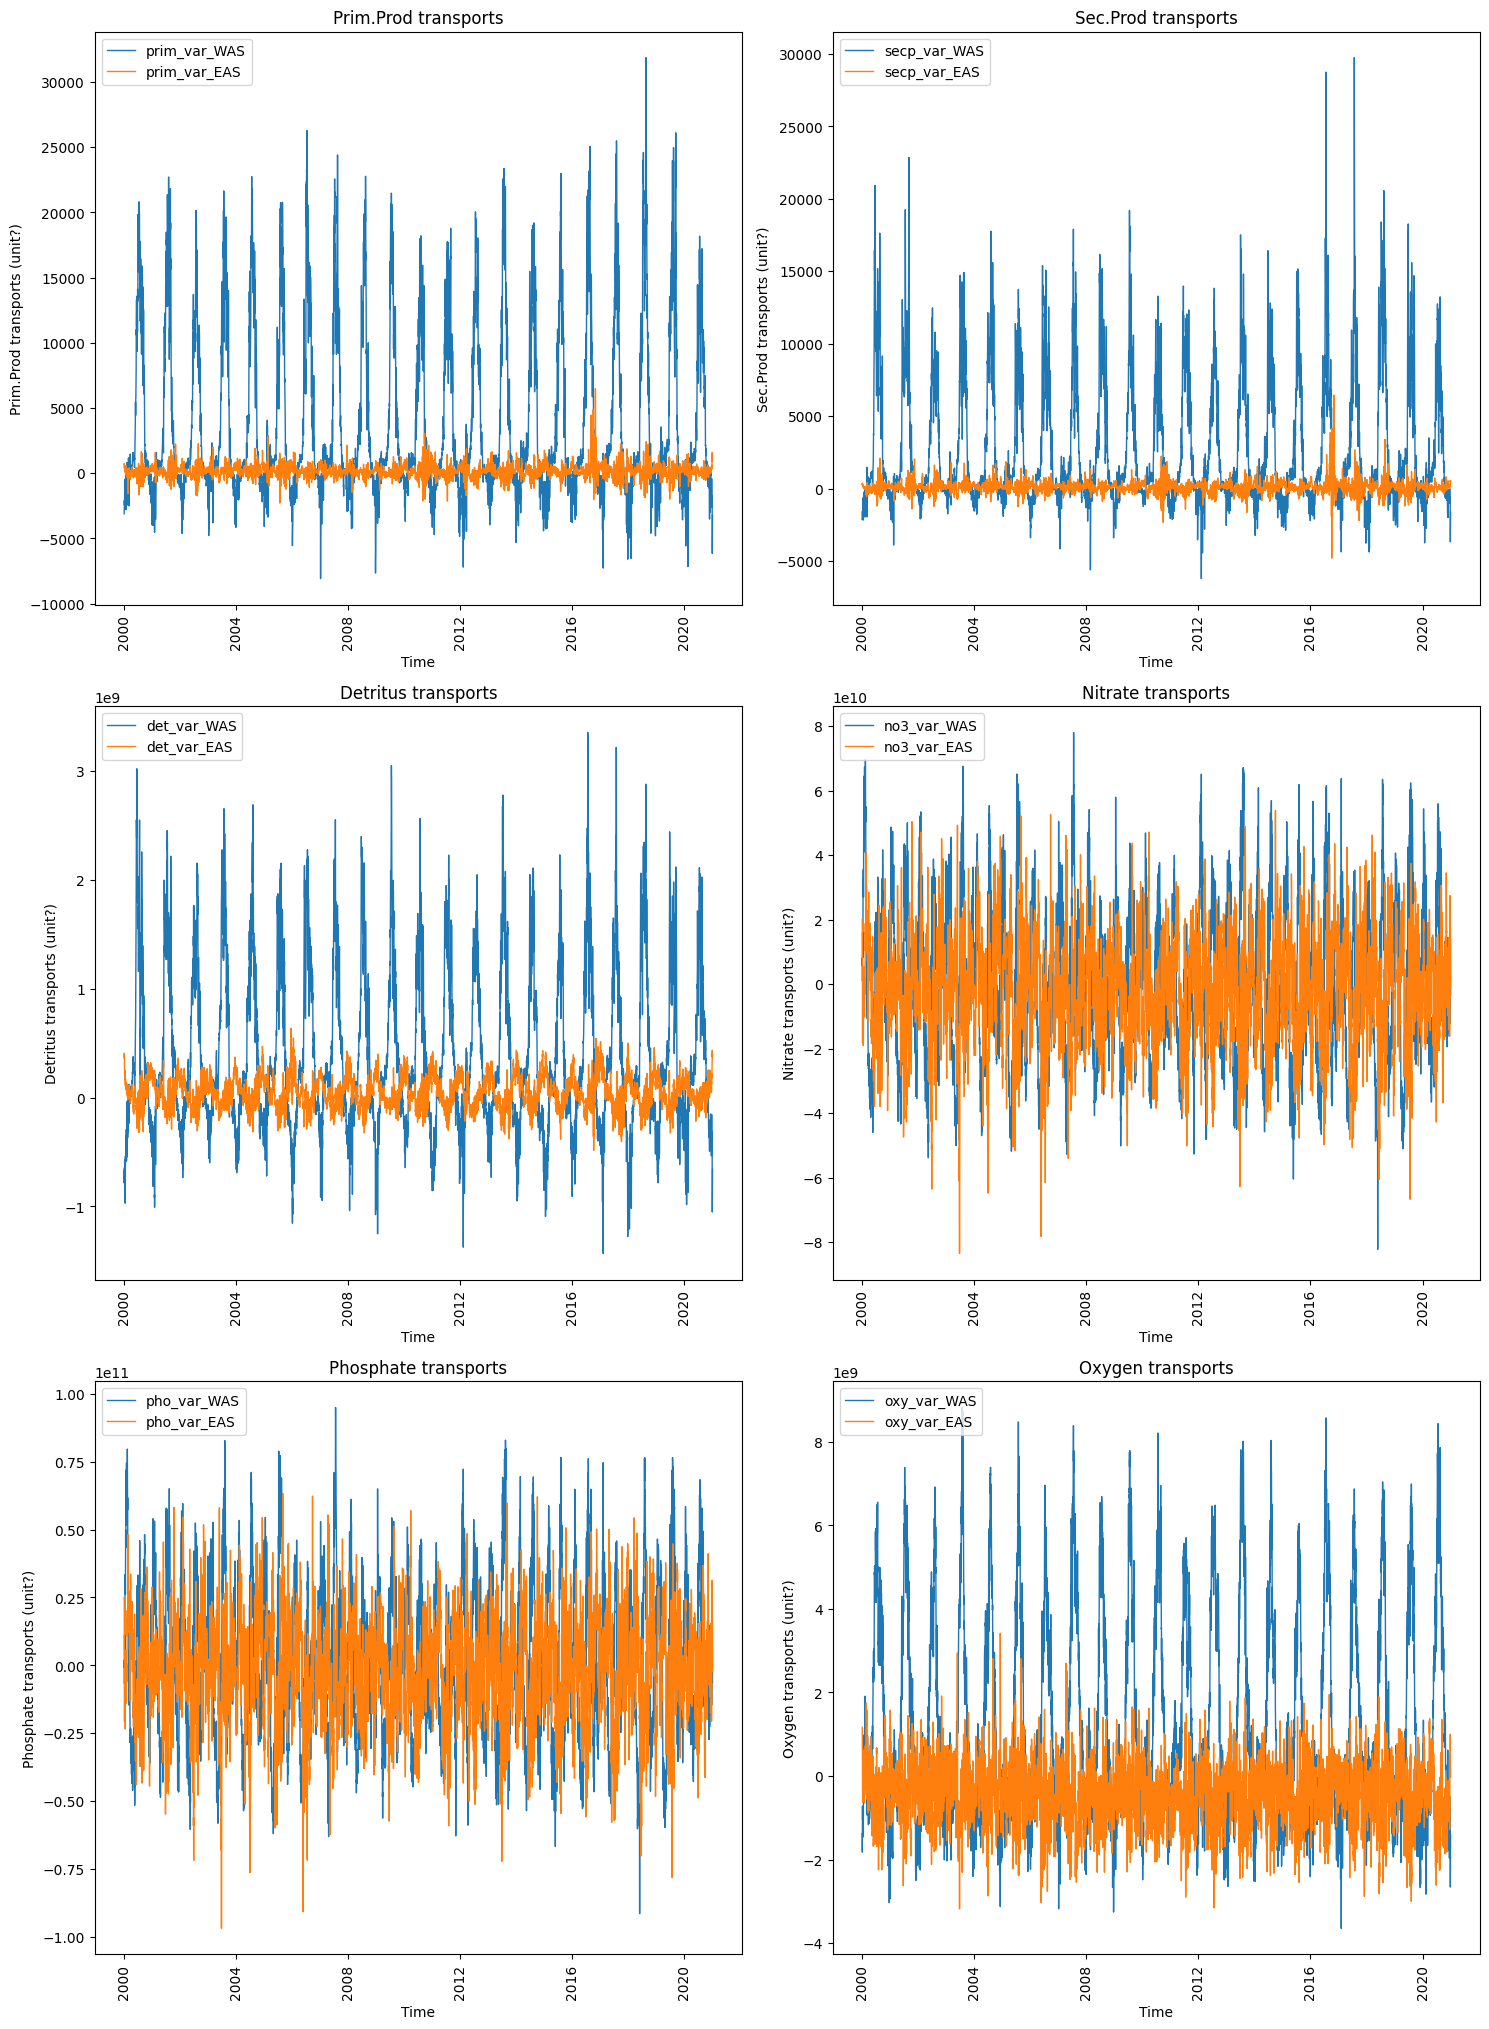

In [17]:
# fig, ax = plt.subplots(figsize=(12, 6))
###
# 1 - primary prod transport
###
plt.subplot(6,2,1)
plt.plot(time_var, prim_var_WAS,linewidth=1, label="prim_var_WAS")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var, prim_var_EAS,linewidth=1, label="prim_var_EAS")

plt.title("Prim.Prod transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Prim.Prod transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)


###
# 2 - secondary prod transport
###
plt.subplot(6,2,2)
plt.plot(time_var, secp_var_WAS,linewidth=1, label="secp_var_WAS")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var, secp_var_EAS,linewidth=1, label="secp_var_EAS")

plt.title("Sec.Prod transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Sec.Prod transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 3 - detritus transport
###
plt.subplot(6,2,3)
plt.plot(time_var, det_var_WAS,linewidth=1, label="det_var_WAS")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var, det_var_EAS,linewidth=1, label="det_var_EAS")

plt.title("Detritus transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Detritus transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 4 - nitrate transport
###
plt.subplot(6,2,4)
plt.plot(time_var, no3_var_WAS,linewidth=1, label="no3_var_WAS")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var, no3_var_EAS,linewidth=1, label="no3_var_EAS")

plt.title("Nitrate transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Nitrate transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 5 - phosphate transport
###
plt.subplot(6,2,5)
plt.plot(time_var, pho_var_WAS,linewidth=1, label="pho_var_WAS")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var, pho_var_EAS,linewidth=1, label="pho_var_EAS")

plt.title("Phosphate transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Phosphate transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 6 - oxygen transport
###
plt.subplot(6,2,6)
plt.plot(time_var, oxy_var_WAS,linewidth=1, label="oxy_var_WAS")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var, oxy_var_EAS,linewidth=1, label="oxy_var_EAS")

plt.title("Oxygen transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Oxygen transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)


plt.tight_layout()
plt.savefig("Arabian_Sea_Transports_DAILY.jpg", bbox_inches='tight',dpi=180)



## monthly time series 

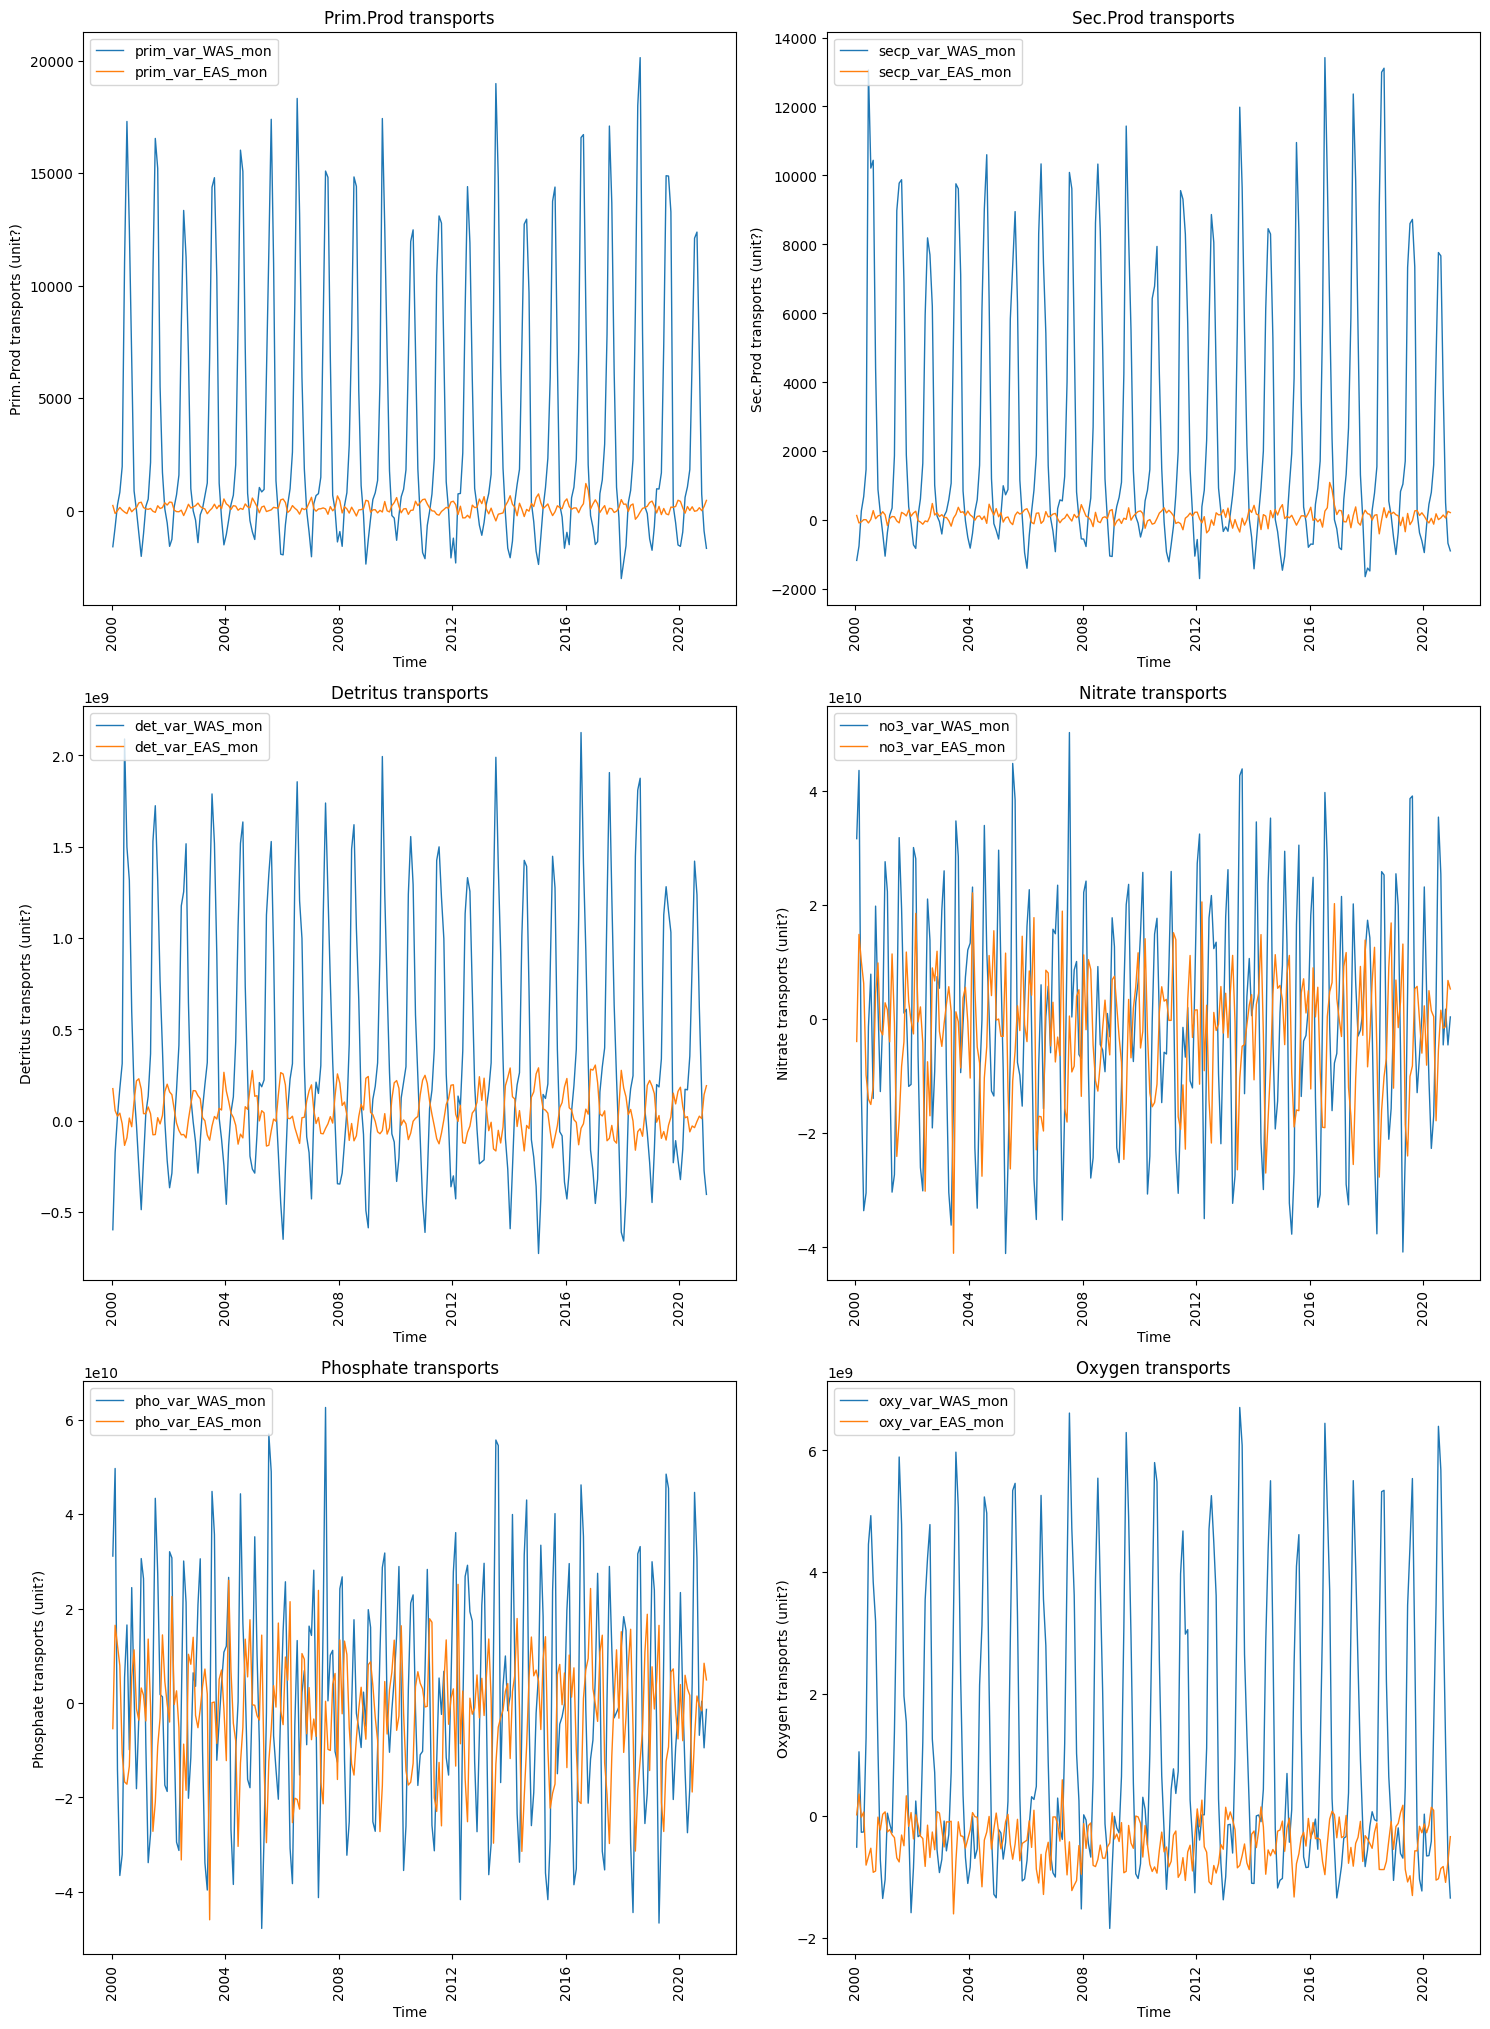

In [19]:
# fig, ax = plt.subplots(figsize=(12, 6))
###
# 1 - primary prod transport
###
plt.subplot(6,2,1)
plt.plot(time_var_mon, prim_var_WAS_mon,linewidth=1, label="prim_var_WAS_mon")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_mon, prim_var_EAS_mon,linewidth=1, label="prim_var_EAS_mon")

plt.title("Prim.Prod transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Prim.Prod transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)


###
# 2 - secondary prod transport
###
plt.subplot(6,2,2)
plt.plot(time_var_mon, secp_var_WAS_mon,linewidth=1, label="secp_var_WAS_mon")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_mon, secp_var_EAS_mon,linewidth=1, label="secp_var_EAS_mon")

plt.title("Sec.Prod transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Sec.Prod transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 3 - detritus transport
###
plt.subplot(6,2,3)
plt.plot(time_var_mon, det_var_WAS_mon,linewidth=1, label="det_var_WAS_mon")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_mon, det_var_EAS_mon,linewidth=1, label="det_var_EAS_mon")

plt.title("Detritus transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Detritus transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 4 - nitrate transport
###
plt.subplot(6,2,4)
plt.plot(time_var_mon, no3_var_WAS_mon,linewidth=1, label="no3_var_WAS_mon")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_mon, no3_var_EAS_mon,linewidth=1, label="no3_var_EAS_mon")

plt.title("Nitrate transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Nitrate transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 5 - phosphate transport
###
plt.subplot(6,2,5)
plt.plot(time_var_mon, pho_var_WAS_mon,linewidth=1, label="pho_var_WAS_mon")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_mon, pho_var_EAS_mon,linewidth=1, label="pho_var_EAS_mon")

plt.title("Phosphate transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Phosphate transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 6 - oxygen transport
###
plt.subplot(6,2,6)
plt.plot(time_var_mon, oxy_var_WAS_mon,linewidth=1, label="oxy_var_WAS_mon")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_mon, oxy_var_EAS_mon,linewidth=1, label="oxy_var_EAS_mon")

plt.title("Oxygen transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Oxygen transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)


plt.tight_layout()
plt.savefig("Arabian_Sea_Transports_MONTHLY.jpg", bbox_inches='tight',dpi=180)



## annual time series 

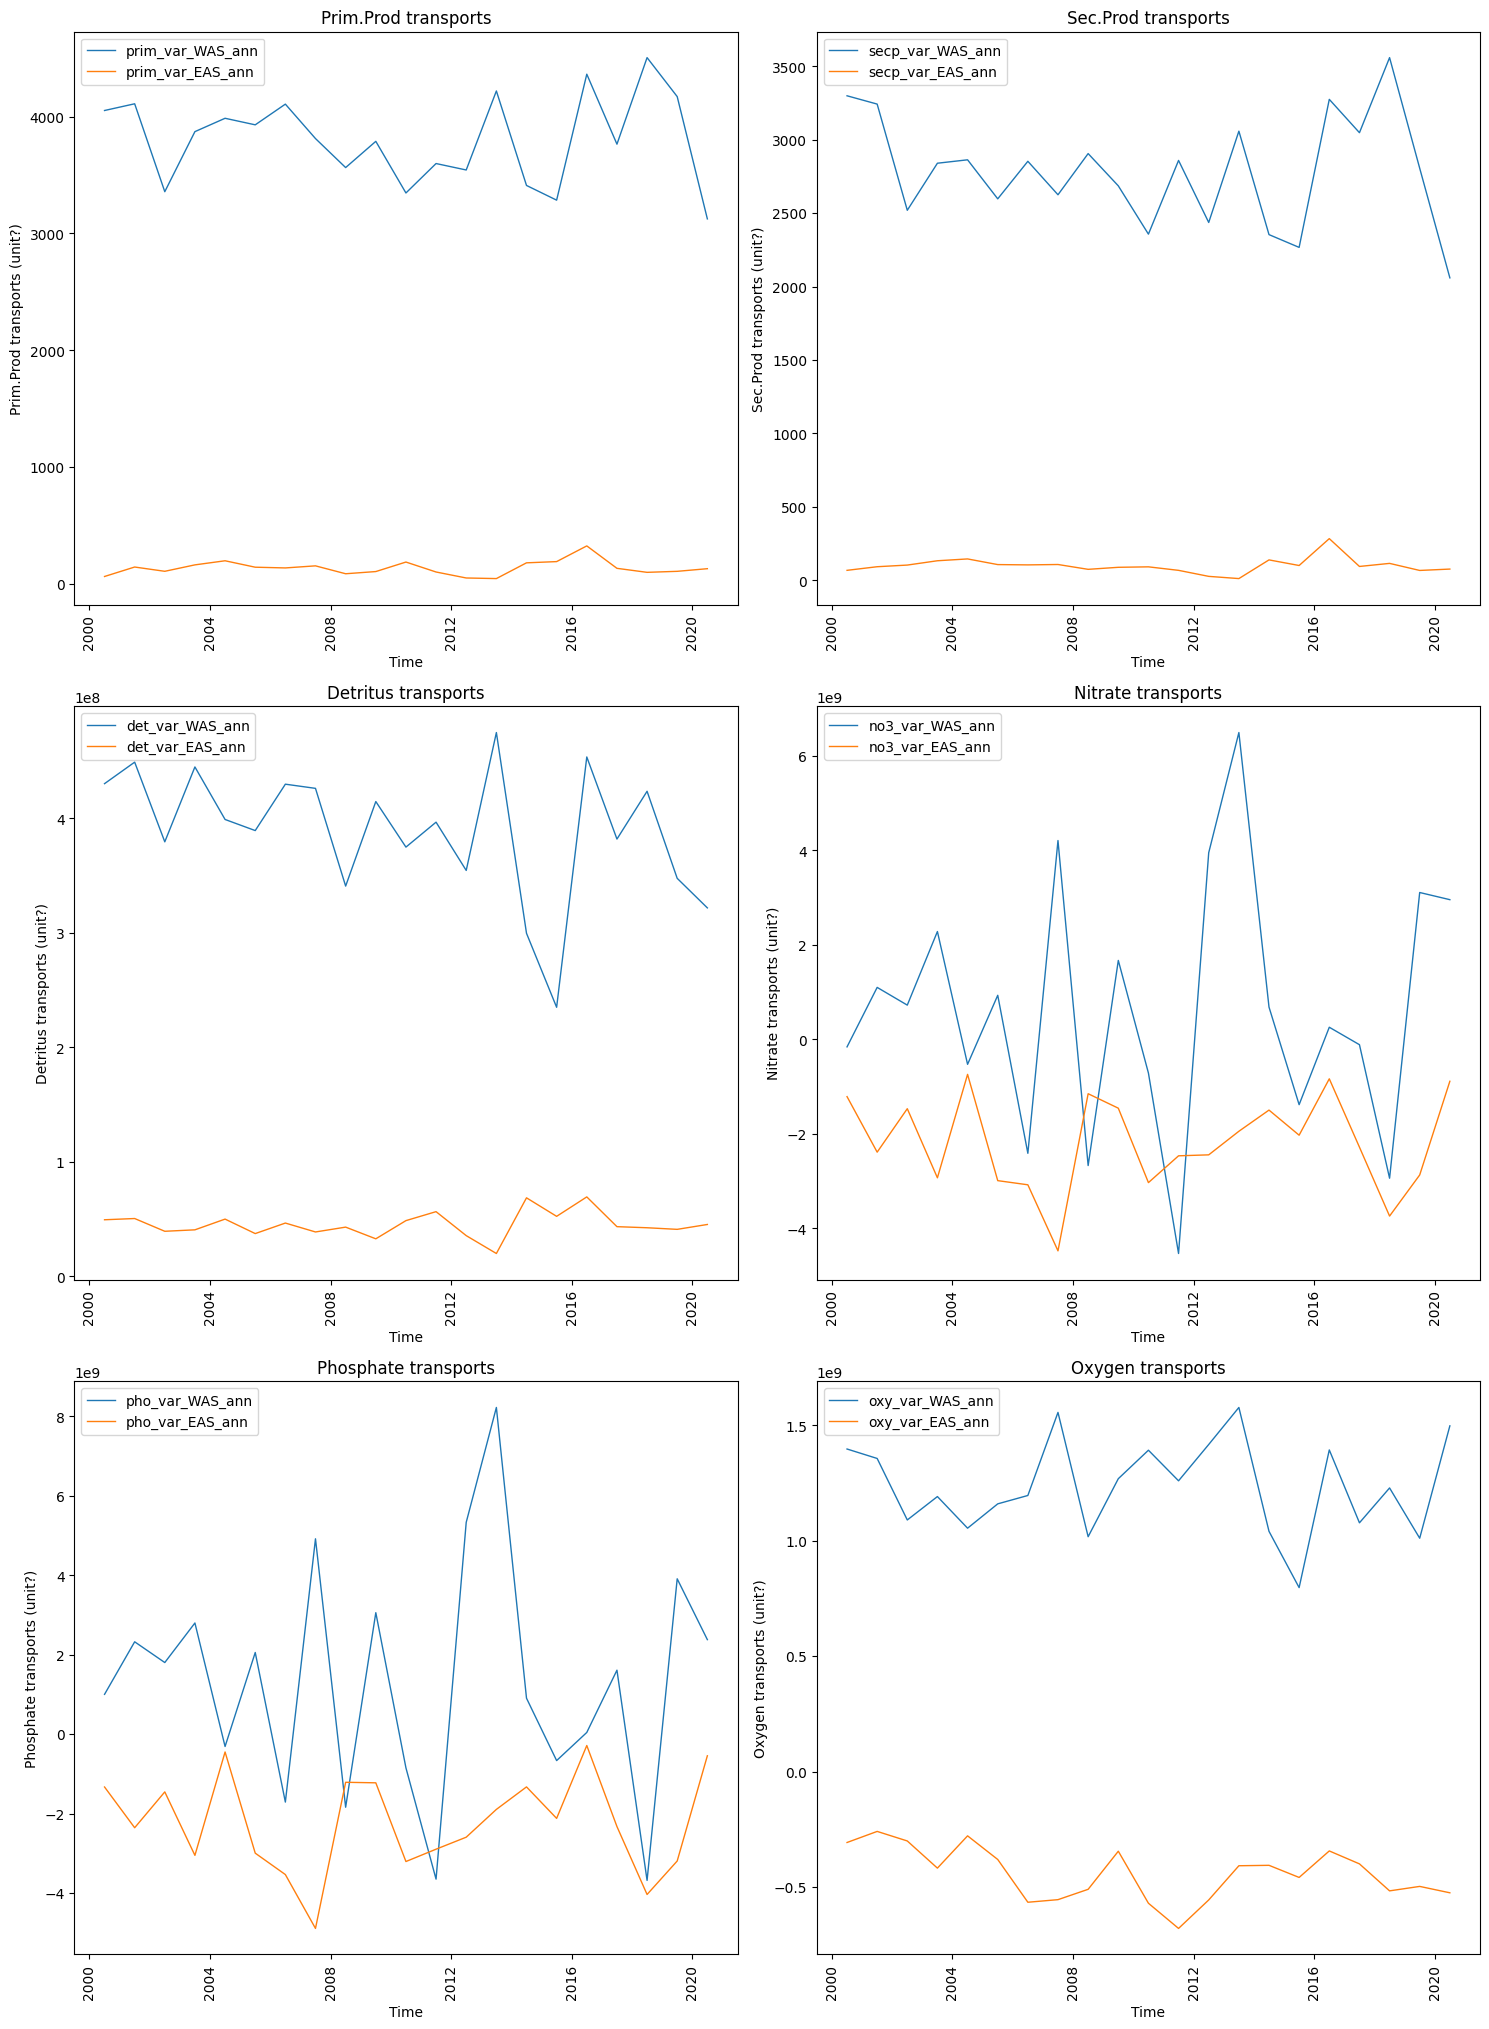

In [20]:
# fig, ax = plt.subplots(figsize=(12, 6))
###
# 1 - primary prod transport
###
plt.subplot(6,2,1)
plt.plot(time_var_ann, prim_var_WAS_ann,linewidth=1, label="prim_var_WAS_ann")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_ann, prim_var_EAS_ann,linewidth=1, label="prim_var_EAS_ann")

plt.title("Prim.Prod transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Prim.Prod transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)


###
# 2 - secondary prod transport
###
plt.subplot(6,2,2)
plt.plot(time_var_ann, secp_var_WAS_ann,linewidth=1, label="secp_var_WAS_ann")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_ann, secp_var_EAS_ann,linewidth=1, label="secp_var_EAS_ann")

plt.title("Sec.Prod transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Sec.Prod transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 3 - detritus transport
###
plt.subplot(6,2,3)
plt.plot(time_var_ann, det_var_WAS_ann,linewidth=1, label="det_var_WAS_ann")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_ann, det_var_EAS_ann,linewidth=1, label="det_var_EAS_ann")

plt.title("Detritus transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Detritus transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 4 - nitrate transport
###
plt.subplot(6,2,4)
plt.plot(time_var_ann, no3_var_WAS_ann,linewidth=1, label="no3_var_WAS_ann")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_ann, no3_var_EAS_ann,linewidth=1, label="no3_var_EAS_ann")

plt.title("Nitrate transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Nitrate transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 5 - phosphate transport
###
plt.subplot(6,2,5)
plt.plot(time_var_ann, pho_var_WAS_ann,linewidth=1, label="pho_var_WAS_ann")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_ann, pho_var_EAS_ann,linewidth=1, label="pho_var_EAS_ann")

plt.title("Phosphate transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Phosphate transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)

###
# 6 - oxygen transport
###
plt.subplot(6,2,6)
plt.plot(time_var_ann, oxy_var_WAS_ann,linewidth=1, label="oxy_var_WAS_ann")#, color='green', linestyle='solid')#, marker='*')
plt.plot(time_var_ann, oxy_var_EAS_ann,linewidth=1, label="oxy_var_EAS_ann")

plt.title("Oxygen transports")#, **title_fontstyle)
plt.xlabel("Time")#$mmol.m^{-3}$)")#, **xlabel_fontstyle)
plt.ylabel("Oxygen transports (unit?)")#, **ylabel_fontstyle)
plt.xticks(rotation=90,size=10)#, **ticks_fontstyle)
plt.yticks(rotation=0,size=10)#, **ticks_fontstyle)
plt.legend(loc=2)


plt.tight_layout()
plt.savefig("Arabian_Sea_Transports_ANNUALY.jpg", bbox_inches='tight',dpi=180)



# END OF CODE